## Examining Angel Measurements to Classify Correct and Wrong Movements using Neural Networks
In this project, we will examine the angles of movements to classify them as either correct or wrong. We will measure the angles .The measurements will be used as input to a neural network that will classify the movements as either correct or wrong.



In [31]:

# importing libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import StandardScaler

## Data Collection
we  have  recorded 8 mkv files 4 files for correct movement and 4 forincorrect  movement ,  then  we labeled the movements as either correct or wrong, then we standrilzed teh data. 

In [32]:

#  importing the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\sam\Downloads\nntest.csv')

# Print the first few rows of the DataFrame
df.head()

,max,min,mean,variance,y
0,89.252469,81.361313,85.529348,5.685907,0
1,93.129307,84.992217,89.310801,6.643683,0
2,85.948046,59.023959,65.723337,42.812277,0
3,99.083614,92.732954,96.249850,2.398053,0
4,76.555638,48.763863,65.502383,90.617521,1


In [33]:
# describe--------- for stratical measure to the dataset
df.describe()

,max,min,mean,variance,y
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,83.869298,63.155870,73.936898,50.473237,0.500000
std,9.626378,20.860083,14.638230,48.456099,0.534522
min,72.144159,34.413749,56.929857,2.398053,0.000000
25%,75.905728,48.166905,64.062740,6.404239,0.000000
50%,83.416602,58.303414,69.114567,46.865203,0.500000
75%,90.221678,82.269039,86.474711,69.684999,1.000000
max,99.083614,92.732954,96.249850,142.002837,1.000000


In [34]:
# separate X (training data) from y (target variable)
cols = df.shape[1]
X = df.iloc[:,0:cols-1]
y= df.iloc[:,cols-1:cols]
y=np.ravel(y)
print(X)
print(y)


         max        min       mean    variance
0  89.252469  81.361313  85.529348    5.685907
1  93.129307  84.992217  89.310801    6.643683
2  85.948046  59.023959  65.723337   42.812277
3  99.083614  92.732954  96.249850    2.398053
4  76.555638  48.763863  65.502383   90.617521
5  80.885158  57.582869  72.505798   50.918129
6  72.144159  46.376032  59.743813   62.707492
7  73.955996  34.413749  56.929857  142.002837
[0 0 0 0 1 1 1 1]


In [36]:


#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:5])
print('y \n' , y[:5])

X 
 [[ 0.59782104  0.93299906  0.84660854 -0.98810411]
 [ 1.02835832  1.1190769   1.12277189 -0.96697353]
 [ 0.23085257 -0.2117536  -0.59984482 -0.16901713]
 [ 1.6896062   1.51577695  1.6295378  -1.06064118]
 [-0.81220907 -0.73756667 -0.61598133  0.88566858]]
y 
 [0 0 0 0 1]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=3)

# Print the shapes of the training and test sets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (5, 4)
Training labels shape: (5,)
Test data shape: (3, 4)
Test labels shape: (3,)


In [38]:
MLPClassifierModel = MLPClassifier(activation='logistic', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                    early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(8,5), max_iter=100)


## Data Preprocessing & Neural Network Architecture
We will also split the data into training and testing sets to evaluate the performance of the neural network, we will use MLFNN. We will train the neural network on the training data and evaluate its performance on the testing data,We will also monitor the accuracy.

In [39]:
MLPClassifierModel.fit(X_train, y_train)

#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
print('----------------------------------------------------')

MLPClassifierModel Train Score is :  1.0
MLPClassifierModel Test Score is :  1.0
MLPClassifierModel loss is :  0.002981325254747063
MLPClassifierModel No. of iterations is :  19
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  logistic
----------------------------------------------------


In [40]:
y_pred = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)
print('Predicted Value for MLPClassifierModel is : ' , y_pred[:2])
print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:1])


Predicted Value for MLPClassifierModel is :  [0 0]
Prediction Probabilities Value for MLPClassifierModel is :  [[9.99690203e-01 3.09797360e-04]]


In [41]:

accuracy_score(y_test, y_pred)

1.0

## Results
After training the neural network, we  evaluated its performance on the testing data. We  calculated the accuracy, confusion_matrix

[[2 0]
 [0 1]]


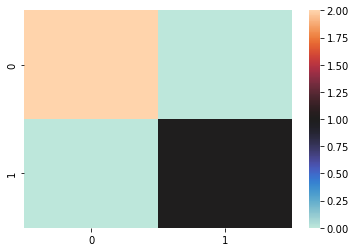

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

## Conclusion
In conclusion, we  examined the angles of movements to classify them as either correct or wrong using a neural network. By collecting and preprocessing the data, training the neural network, and evaluating its performance. 